In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [85]:
df = pd.read_csv('../data/alpha.csv')
df

,current_player_score,opponent_score,current_player_deadwood,current_player_num_options,is_current_player_hand_winner,is_current_player_game_winner
0,0,0,27,0,1.0,0
1,26,0,47,10,1.0,0
2,47,0,38,2,0.0,0
3,47,3,45,2,0.0,0
4,47,27,17,2,1.0,0
...,...,...,...,...,...,...
9882,0,12,73,10,0.0,0
9883,0,40,39,11,0.0,0
9884,0,92,55,7,1.0,0
9885,17,92,31,2,0.0,0


In [95]:
X = df[["current_player_score","opponent_score","current_player_deadwood","current_player_num_options"]]
y = df[["is_current_player_hand_winner"]] # ,"is_current_player_game_winner"]]

In [100]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [88]:
print(linear_regressor.intercept_)
print(linear_regressor.coef_)

[0.77975864 0.62411788]
[[ 0.00030801 -0.00049586 -0.00525651  0.00346266]
 [ 0.00627739 -0.00649394 -0.00200245 -0.00152306]]


In [89]:
linear_regressor.score(X, y)

0.09462785132011997

In [90]:
y_pred = linear_regressor.predict(X)
y_pred

array([[ 0.63783297,  0.57005172],
       [ 0.57533765,  0.67798421],
       [ 0.60141313,  0.84001583],
       ...,
       [ 0.46927   , -0.09412075],
       [ 0.58334902,  0.06826891],
       [ 0.45805116, -0.02235672]])

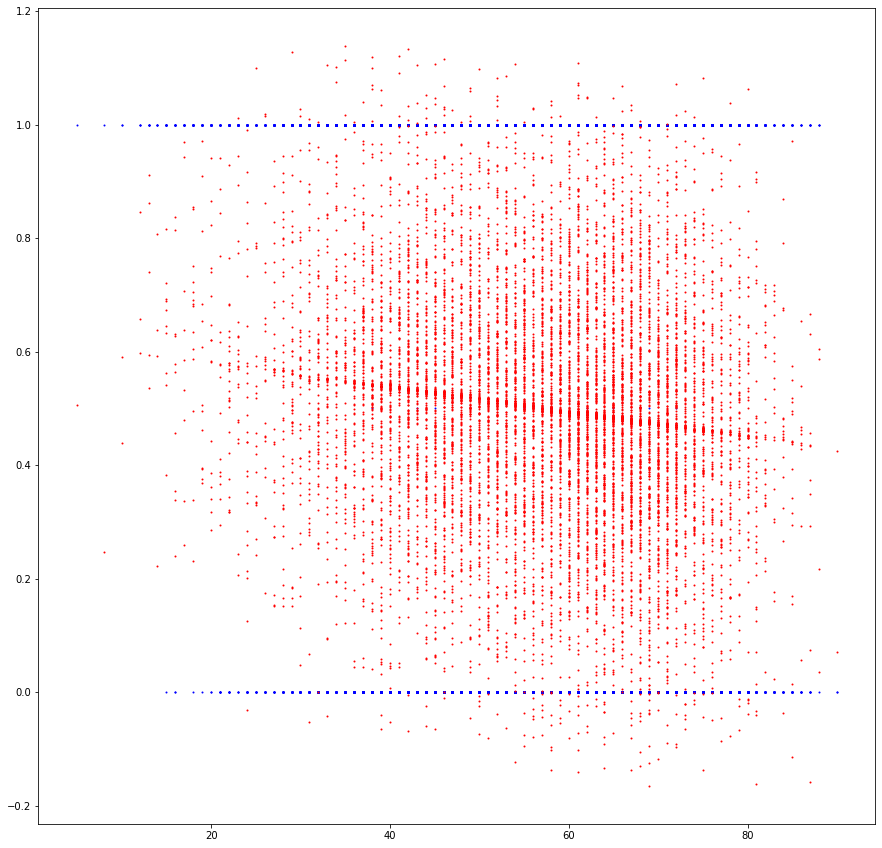

In [101]:
fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[['is_current_player_hand_winner']], s=1, color='blue')
plt.scatter(X[['current_player_deadwood']], y_pred.T[1], s=1, color='red')
plt.show()

In [97]:
clf = LogisticRegression(random_state=0).fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'

In [ ]:
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])

clf.score(X, y)